In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import plotly.express as px
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahmoud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from utils_plotting import plot_value_counts_with_avg

In [3]:
df = pd.read_csv("data/original/hatebase.csv")

In [4]:
df.duplicated().sum()

13181

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236738 entries, 0 to 236737
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweet       236738 non-null  object
 1   category    236738 non-null  object
 2   data        236738 non-null  object
 3   class       236738 non-null  object
 4   word_count  236738 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 9.0+ MB


In [ ]:
# # Register tqdm for pandas
# tqdm.pandas()


# # Function to count words using NLTK with error handling
# def count_words_nltk(text):
#     if not isinstance(text, str):
#         return 0  # Return zero word count for non-string inputs
#     words = word_tokenize(text)
#     return len(words)

# # Apply the function to each tweet with a progress bar
# df['word_count'] = df['tweet'].progress_apply(count_words_nltk)

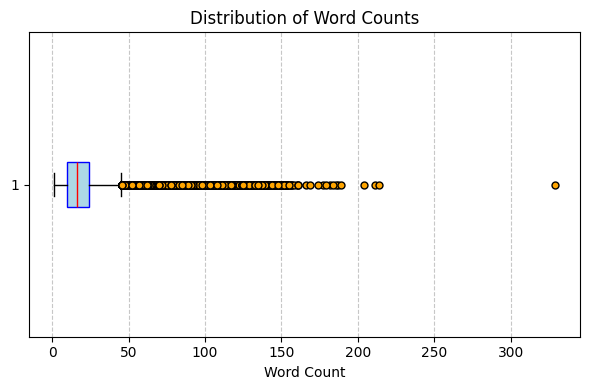

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Set figure size
plt.boxplot(df["word_count"].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

plt.title("Distribution of Word Counts")
plt.xlabel("Word Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hatebase_max_text_length = 60
print(f"# of instances: {(df["word_count"] > hatebase_max_text_length).sum()}, when max length: {hatebase_max_text_length}")

hatebase_max_text_length = 40
print(f"# of instances: {(df["word_count"] > hatebase_max_text_length).sum()}, when max length: {hatebase_max_text_length}")

# of instances: 6870, when max length: 60
# of instances: 21407, when max length: 40


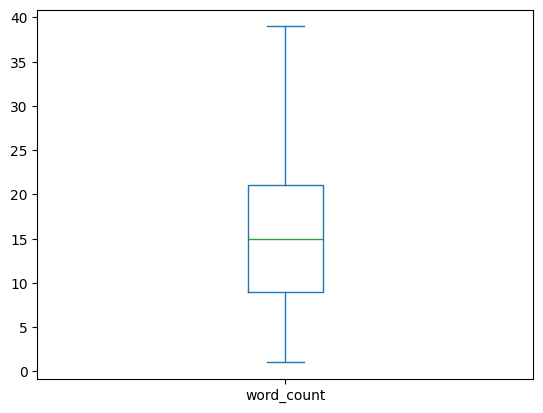

In [ ]:
df[df["word_count"] < hatebase_max_text_length].plot(kind="box");

In [ ]:
df = df[df["word_count"] < hatebase_max_text_length]
df
# df.to_csv("data/hatebase_trimmed.csv", index=False)

,tweet,category,data,class,word_count
0,its like they are gatekeeping tiredness so weird,neutral,goemotion,safe,8
1,rt argenivee its kinda pathetic how these bitc...,offensive,Hate_Offensive,unsafe,17
2,personal insults arent allowed around here wee...,disapproval,goemotion,safe,11
3,now when i put this pussy on vivian she bet no...,offensive,Hate_Offensive,unsafe,13
4,sometime i wish i wasnt colored,offensive,Hate_Offensive,unsafe,6
...,...,...,...,...,...
236733,downvoting for reupload please stop this nobod...,neutral,goemotion,safe,9
236734,act like a worker think like a boss,not-sexist,CMSB,safe,8
236735,it could nt have anything to do with ethnicity...,noHate,Stormfront,safe,17
236736,rt stonyxx give me conversationthey think u gi...,offensive,Hate_Offensive,unsafe,14


In [ ]:
# fig = px.violin(df, x='word_count', orientation='h', box=True, points="all",
#                 title="Distribution of Tweet Lengths",
#                 labels={'word_count': 'Number of Words'})
# fig.update_layout(xaxis_title='Number of Words', yaxis_title='')
# # fig.show()

In [ ]:
# fig.write_html("Hatebase_violin.html")
# fig.write_image("Hatebase_violin.png")

In [ ]:
plot_value_counts_with_avg(df, 'category')

In [ ]:
plot_value_counts_with_avg(df, 'data')

### 🧠 **Hate Speech / Offensive Language Dataset Comparison**

| **Dataset**            | **Purpose**                                    | **Label Types**                                                                 | **Hate Speech Focused?** | **Notes**                                                                                     |
|------------------------|------------------------------------------------|----------------------------------------------------------------------------------|--------------------------|----------------------------------------------------------------------------------------------|
| **GoEmotions**         | Emotion classification                         | 27 emotions + neutral                                                           | ❌ Not hate-focused       | Great for emotional nuance; useful as context for intent detection.                          |
| **Hate_Offensive**     | Detect hate speech and offensive content       | Hate, Offensive, Neither                                                        | ✅ Yes                    | Common baseline; useful for 3-class classification problems.                                 |
| **SBIC**               | Social bias and offensive implications         | Intent, Offensiveness, Implicit Social Bias                                     | ✅ Yes (implicit bias)    | Good for detecting subtle, socially biased or inappropriate language.                       |
| **UC_Berkley_HateSpeech** | Hate and offensive speech detection          | Hate Speech, Offensive, Neutral                                                 | ✅ Yes                    | Rich annotations, frequently used in hate speech detection research.                         |
| **Slur**               | Detect usage of slurs                          | Slur word lists or binary (slur vs not)                                         | ✅ Yes                    | Often a dictionary-style dataset or flagging system for detecting explicit slurs.            |
| **HateXplain**         | Explainable hate speech detection              | Hate/Offensive/Normal + Rationales (why it's hate)                              | ✅ Yes + rationale         | Crowdsourced explanations make it good for explainable AI (XAI) research.                   |
| **CMSB** *(assumed)*   | Possibly Cyberbullying or Content Moderation   | Unknown – might include bullying, threats, or toxic behavior                    | ❓ Not clear              | Unclear without more context—CMSB could be a typo or niche corpus.                         |
| **Stormfront**         | Hate speech from extremist forums              | Binary or multi-class (Hate, Neutral, etc.)                                     | ✅ Extreme hate speech    | Often used for detecting white supremacist or highly toxic language.                        |
| **Peace_Violence**     | Classify peaceful vs violent content           | Peace, Neutral, Violence                                                        | ⚠️ Borderline             | Helpful for violence detection, less useful for general hate speech unless adapted.         |
| **OWS (Offensive Words and Slurs)** | Lexicon of offensive terms               | Offensive words, slurs, flags                                                   | ✅ Lexicon-based          | Often used for rule-based detection or token-level flagging of offensive content.           |

## Class Balance

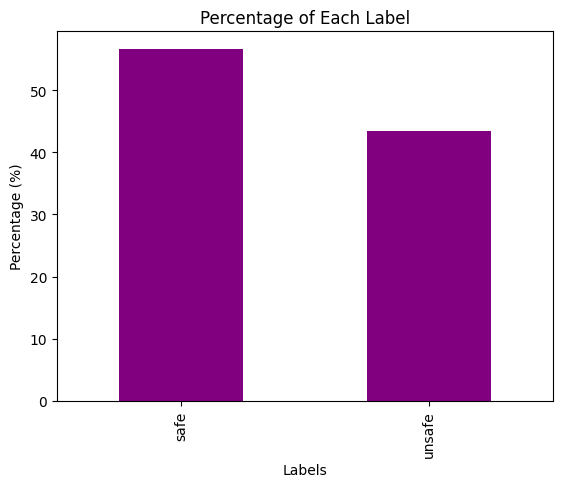

In [ ]:
# Calculating the normalized value counts for the 'labels' column
normalized_counts = df["class"].value_counts(normalize=True) * 100  # Convert to percentage

# Plotting the normalized counts
normalized_counts.plot(kind="bar", color='purple')  # Adjust color as needed

# Adding titles and labels
plt.title('Percentage of Each Label')
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')

# Display the plot
plt.show()

In [1]:
import torch

torch.cuda.is_available()

True

In [ ]:
from unsloth import FastLanguageModel
from peft import PeftModel
import torch

# Load the base model
base_model_name = "unsloth/Meta-Llama-3.1-8B-Instruct"

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=base_model_name,
    max_seq_length=2048,  # Must match fine-tuning
    load_in_4bit=True,
)

# Load the fine-tuned LoRA adapter
lora_model_name = "Machlovi/SafeLlama"
model = PeftModel.from_pretrained(model, lora_model_name)

model.eval()

==((====))==  Unsloth 2025.5.7: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce GTX 1660 Ti with Max-Q Design. Num GPUs = 1. Max memory: 6.0 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
